C:\Users\lenovo\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


The number of clusters not having any geo tagged data are: [11]


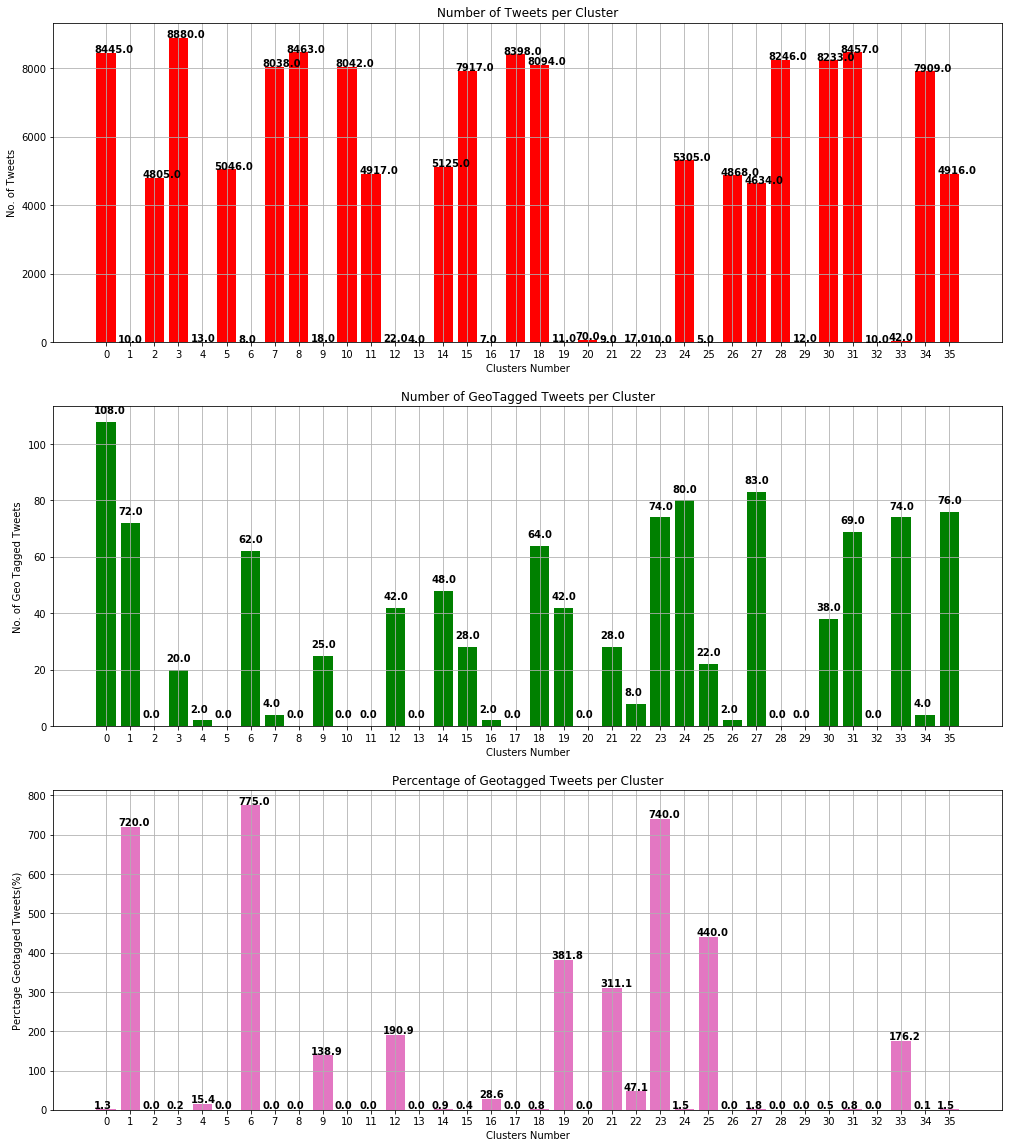

In [3]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

# Get cluster data from text file
data = np.genfromtxt('GeoClusterCount.csv', delimiter='\t')
# Name of cluster
cluster_name = data[:,0]
# Count of geo-tagged data in a cluster
cluster_count = data[:,1]
# Data in file is unsorted so need to sort in ascending order
cluster_name = cluster_name[np.argsort(cluster_name)]
# Sort the count data as well
cluster_count = cluster_count[np.argsort(cluster_name)]
allcounts = np.genfromtxt('counts.txt', delimiter=' ')
# Find percentage of Geotagged data over all cluster data
percentage_tagged = (cluster_count/allcounts)*100

fig = plt.figure(figsize=(17,20))  # create a new figure

#All tweets per cluster
ax = fig.add_subplot(3,1,1)
ax.cla()
ax.set_xlabel('Clusters Number')
ax.set_ylabel('No. of Tweets')
ax.grid('on')
ax.set_title('Number of Tweets per Cluster')
ax.bar(cluster_name,allcounts,color='red')
for i, v in enumerate(allcounts):
    ax.text(i-0.5,v+3, str(v), color='Black', fontweight='bold')
ax.set_xticks(cluster_name)

# All geo-tagged data per cluster
ax = fig.add_subplot(3, 1, 2) 
ax.cla()
ax.set_xlabel('Clusters Number')
ax.set_ylabel('No. of Geo Tagged Tweets')
ax.grid('on')
ax.set_title('Number of GeoTagged Tweets per Cluster')
ax.bar(cluster_name,cluster_count,color='green')
for i, v in enumerate(cluster_count):
    ax.text(i-0.5,v+3, str(v), color='Black', fontweight='bold')
ax.set_xticks(cluster_name)

# Percentage of cluster data that is geotagged data 
ax = fig.add_subplot(3,1,3)
ax.cla()
ax.set_xlabel('Clusters Number')
ax.set_ylabel('Perctage Geotagged Tweets(%)')
ax.grid('on')
ax.set_title('Percentage of Geotagged Tweets per Cluster')
ax.bar(cluster_name,percentage_tagged,color='C6')
for i, v in enumerate(np.around(percentage_tagged,1)):
    ax.text(i-0.5,v+3, str(v), color='Black', fontweight='bold')
ax.set_xticks(cluster_name)

# Count number of clusters having no geo information
unique, counts = np.unique(cluster_count, return_counts=True)
print('The number of clusters not having any geo tagged data are:',counts[unique==0])

C:\Users\lenovo\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


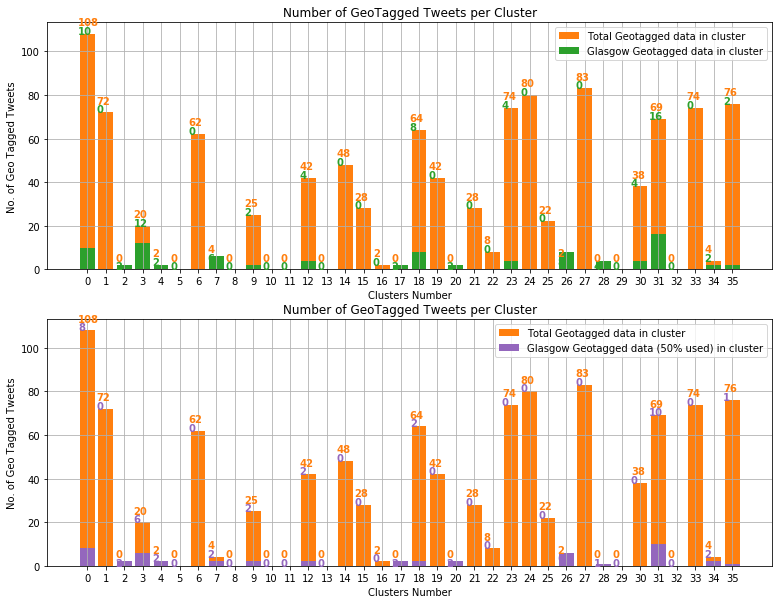

In [13]:
# Get Glasgow geo-tagged tweets from file
glasgow_data = np.genfromtxt('GlagowGeoClusterCount.csv', delimiter='\t')
# Get count of tweets
glasgow_tagged_data = glasgow_data[:,1]

# Get partial Glasgow geo-tagged tweets from file
glasgow_partialdata = np.genfromtxt('GlagowPartialGeoClusterCount.csv', delimiter='\t')
# Get count of tweets
glasgow_partialtagged_data = glasgow_partialdata[:,1]

fig3 = plt.figure(figsize=(13,10))  # create a new figure

# Plot graph show portion of Glasgow geotagged tweets to all geo-tagged tweets in cluster
ax3 = fig3.add_subplot(2,1,1)
ax3.cla()
ax3.set_xlabel('Clusters Number')
ax3.set_ylabel('No. of Geo Tagged Tweets')
ax3.grid('on')
ax3.set_title('Number of GeoTagged Tweets per Cluster')
ax3.bar(cluster_name,cluster_count,color='C1', label='Total Geotagged data in cluster')
ax3.bar(cluster_name,glasgow_tagged_data,color='C2', label='Glasgow Geotagged data in cluster')
for i, v in enumerate(cluster_count):
    ax3.text(i-0.5,v+4, str(int(v)), color='C1', fontweight='bold')
    ax3.text(i-0.5,v, str(int(glasgow_tagged_data[i])), color='C2', fontweight='bold')
ax3.legend()
ax3.set_xticks(cluster_name)
# Plot graph show portion of Glasgow geotagged tweets (using 50% data) to all geo-tagged tweets in cluster
ax3 = fig3.add_subplot(2,1,2)
ax3.cla()
ax3.set_xlabel('Clusters Number')
ax3.set_ylabel('No. of Geo Tagged Tweets')
ax3.grid('on')
ax3.set_title('Number of GeoTagged Tweets per Cluster')
ax3.bar(cluster_name,cluster_count,color='C1', label='Total Geotagged data in cluster')
ax3.bar(cluster_name,glasgow_partialtagged_data,color='C4', label='Glasgow Geotagged data (50% used) in cluster')
for i, v in enumerate(cluster_count):
    ax3.text(i-0.5,v+4, str(int(v)), color='C1', fontweight='bold')
    ax3.text(i-0.5,v, str(int(glasgow_partialtagged_data[i])), color='C4', fontweight='bold')
ax3.legend()
ax3.set_xticks(cluster_name)

C:\Users\lenovo\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


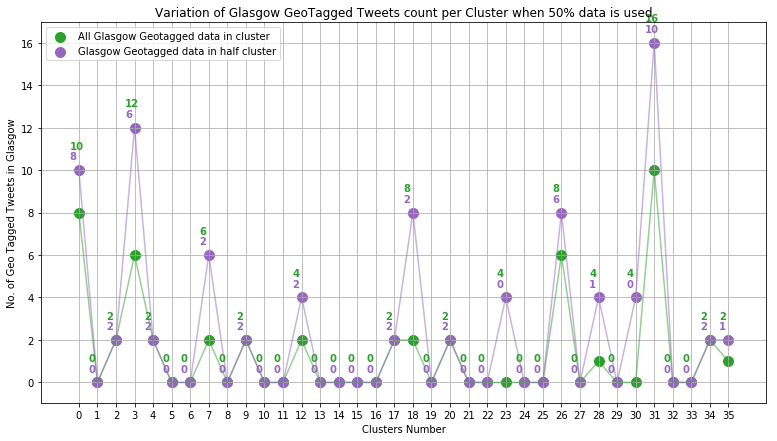

In [31]:
# Compare the Glasgow geo-tagged tweets count when 100% of the cluster data is 
# used and when only 50% of the cluster data is used
fig4 = plt.figure(figsize=(13,7)) # Create new figure
ax4 = fig4.add_subplot(1,1,1)
ax4.cla()
ax4.set_xlabel('Clusters Number')
ax4.set_ylabel('No. of Geo Tagged Tweets in Glasgow')
ax4.grid('on')
ax4.set_title('Variation of Glasgow GeoTagged Tweets count per Cluster when 50% data is used')
ax4.scatter(cluster_name,glasgow_partialtagged_data,color='C2', label='All Glasgow Geotagged data in cluster', s= 100)
ax4.scatter(cluster_name,glasgow_tagged_data,color='C4', label='Glasgow Geotagged data in half cluster', s=100)
ax4.plot(cluster_name,glasgow_partialtagged_data,color='C2', alpha = 0.5)
ax4.plot(cluster_name,glasgow_tagged_data,color='C4', alpha = 0.5)
# Add count value to graph
for i, v in enumerate(glasgow_tagged_data):
    ax4.text(i-0.5,v+1, str(int(v)), color='C2', fontweight='bold')
    ax4.text(i-0.5,v+0.5, str(int(glasgow_partialtagged_data[i])), color='C4', fontweight='bold')
ax4.legend()
ax4.set_xticks(cluster_name)